In [450]:
#Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [451]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [452]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [453]:
train.shape

(8068, 11)

In [454]:
train["Segmentation"].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

**Data is pretty well equally distributed**

In [455]:
cat_grps= train.groupby('Segmentation')

In [456]:
import seaborn as sns

C:\Users\Abhay\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Abhay\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


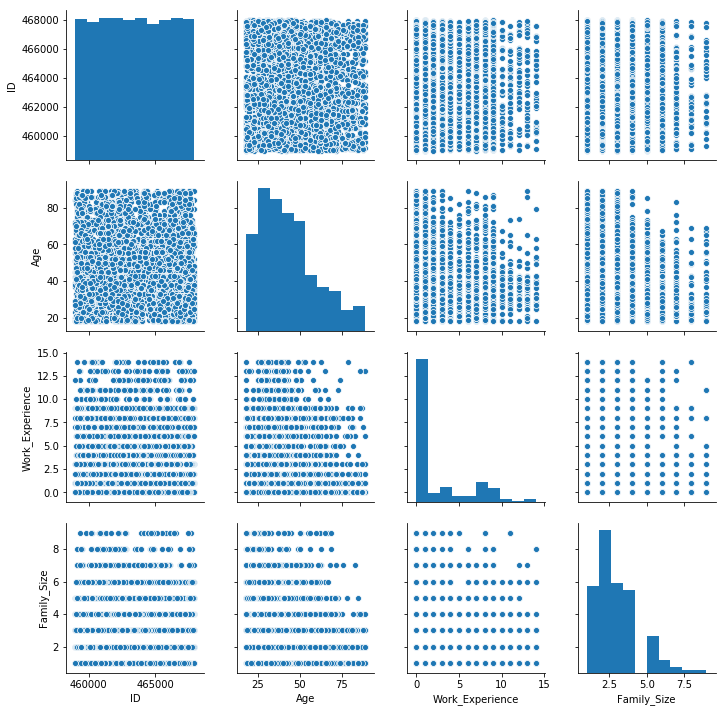

In [457]:
sns.pairplot(train)

In [458]:
train['Profession'].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

In [459]:
train['Var_1'].value_counts()

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64

In [460]:
for col in train.columns[1:]:
    print("Unique value counts for", col)
    print(train[col].value_counts())
    print("\n----------------------------------\n")

Unique value counts for Gender
Male      4417
Female    3651
Name: Gender, dtype: int64

----------------------------------

Unique value counts for Ever_Married
Yes    4643
No     3285
Name: Ever_Married, dtype: int64

----------------------------------

Unique value counts for Age
35    250
37    234
33    232
42    232
27    229
40    229
43    226
32    221
38    221
28    220
25    218
31    214
36    209
39    208
41    206
26    200
30    196
29    183
50    180
47    167
51    161
46    160
45    158
53    158
52    157
49    155
48    154
22    142
19    134
18    132
     ... 
61     93
57     93
62     85
63     80
58     80
65     72
66     72
70     71
68     69
69     67
72     67
67     55
73     54
71     49
81     42
82     36
89     36
83     35
88     35
79     34
84     33
75     32
86     30
74     30
77     30
78     29
87     28
76     27
80     24
85     22
Name: Age, Length: 67, dtype: int64

----------------------------------

Unique value counts for Graduated

## To analyse the hypothesis that the categories are more dependent on the spending_score

In [461]:
### Getting data based on the categories grouped
for grp in train['Segmentation'].value_counts().index:
    print("For the group",grp)
    print(cat_grps.get_group(grp)['Spending_Score'].value_counts())
    print("\n---------------------------------------\n")

For the group D
Low        1974
High        156
Average     138
Name: Spending_Score, dtype: int64

---------------------------------------

For the group A
Low        1358
Average     343
High        271
Name: Spending_Score, dtype: int64

---------------------------------------

For the group C
Average    903
Low        662
High       405
Name: Spending_Score, dtype: int64

---------------------------------------

For the group B
Low        884
Average    590
High       384
Name: Spending_Score, dtype: int64

---------------------------------------



**Analysed that segmentation is not solely dependent on one or just two of the columns, don't interpret the basis for segmentation**

**Also data is not normally distributed, some category has more value under one type**

In [462]:
train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [463]:
test.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [464]:
def bar_chart(feature):
    grad = train[train['Graduated']=='Yes'][feature].value_counts()
    not_grad = train[train['Graduated']=='No'][feature].value_counts()
    df = pd.DataFrame([grad, not_grad])
    df.index = ['Graduated', 'Not Graduated']
    #print(df)
    df.plot(kind='bar',stacked=True, figsize=(10,5))

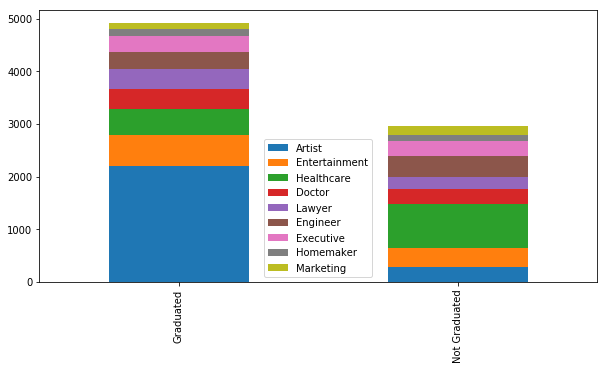

In [465]:
bar_chart('Profession')

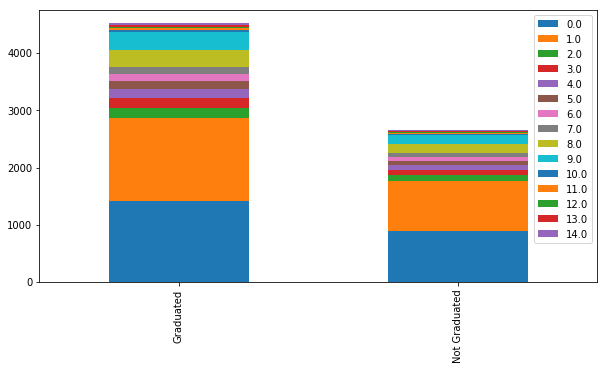

In [466]:
bar_chart('Work_Experience')

In [467]:
filt = train['Age']<=30
train.loc[filt, 'Ever_Married'].value_counts()

No     1656
Yes     325
Name: Ever_Married, dtype: int64

In [468]:
### Filling the marital status
train.loc[filt, 'Ever_Married'] = train.loc[filt, 'Ever_Married'].fillna('No')
test.loc[test['Age']<=30, 'Ever_Married'] = test.loc[test['Age'] <=30, 'Ever_Married'].fillna('No')

In [469]:
filt_1 = train['Age']>30

In [470]:
train.loc[filt_1, 'Ever_Married'] = train.loc[filt_1, 'Ever_Married'].fillna('Yes')
test.loc[test['Age']>30, 'Ever_Married'] = test.loc[test['Age']>30, 'Ever_Married'].fillna('Yes')

In [471]:
data_set = [train, test]

In [472]:
### Filling for the graduation 
filt_age_train = train['Age'] <= 19 #Not graduated 
filt_age_test = test['Age'] <= 19
filt_1_train = train['Age'] > 19
filt_1_test = test['Age'] > 19

In [473]:
train.loc[filt_age_train, 'Graduated'] = train.loc[filt_age_train, 'Graduated'].fillna('No')
train.loc[filt_1_train, 'Graduated'] = train.loc[filt_1_train, 'Graduated'].fillna('Yes')
test.loc[filt_age_test, 'Graduated'] = test.loc[filt_age_test, 'Graduated'].fillna('No')
test.loc[filt_1_test, 'Graduated'] = test.loc[filt_1_test, 'Graduated'].fillna('Yes')

In [474]:
## Filling the var_1 column with mode value
train['Var_1'].mode()

0    Cat_6
dtype: object

In [475]:
for df in data_set:
    df['Var_1'].fillna('Cat_6', inplace = True)

In [476]:
score_grp = train.groupby('Spending_Score')
for grp in train['Spending_Score'].value_counts().index:
    print("For the group",grp)
    print(score_grp.get_group(grp)['Family_Size'].value_counts())
    print("\n---------------------------------------\n")

For the group Low
1.0    1429
2.0     992
3.0     816
4.0     732
5.0     360
6.0     140
7.0      70
8.0      38
9.0      26
Name: Family_Size, dtype: int64

---------------------------------------

For the group Average
2.0    813
3.0    451
4.0    434
5.0    164
6.0     47
7.0     14
9.0      7
1.0      7
8.0      6
Name: Family_Size, dtype: int64

---------------------------------------

For the group High
2.0    585
3.0    230
4.0    213
5.0     88
6.0     25
1.0     17
7.0     12
9.0     11
8.0      6
Name: Family_Size, dtype: int64

---------------------------------------



In [477]:
train.loc[train['Spending_Score'] == 'Low','Family_Size'] = train.loc[train['Spending_Score']=='Low','Family_Size'].fillna(1.0)
test.loc[test['Spending_Score'] == 'Low','Family_Size'] = test.loc[test['Spending_Score']=='Low','Family_Size'].fillna(1.0)

In [478]:
train['Family_Size'].fillna(2.0, inplace= True)
test['Family_Size'].fillna(2.0, inplace = True)

In [479]:
train.loc[train['Profession'] == 'Entertainment', 'Work_Experience'].value_counts()

1.0     306
0.0     244
9.0      56
8.0      52
2.0      34
6.0      33
5.0      28
7.0      28
3.0      26
4.0      24
14.0      9
11.0      8
10.0      6
12.0      5
13.0      3
Name: Work_Experience, dtype: int64

In [480]:
for df in data_set:
    df['Work_Experience'].fillna(1.0, inplace = True)
    df['Profession'].fillna('Artist', inplace = True)

In [481]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
ID                 8068 non-null int64
Gender             8068 non-null object
Ever_Married       8068 non-null object
Age                8068 non-null int64
Graduated          8068 non-null object
Profession         8068 non-null object
Work_Experience    8068 non-null float64
Spending_Score     8068 non-null object
Family_Size        8068 non-null float64
Var_1              8068 non-null object
Segmentation       8068 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 693.4+ KB


In [482]:
### Using get_dummies to encode using one-hot encoding
# Encode segmentation
seg_mapping = {'A' : 0, 'B' : 1, 'C' : 2, 'D' : 3}
train['Segmentation'] = train['Segmentation'].map(seg_mapping)

In [483]:
bool_map = {'Yes': 1, 'No' : 0}
prof_map = {'Artist' : 0,'Healthcare' :1,'Entertainment' :2,'Engineer' : 3,'Doctor' : 4,'Lawyer' : 5,'Executive' : 6,'Marketing' : 7,'Homemaker' : 8}
spend_map = {'Low' : 0, 'Average' : 1, 'High' : 2}
gender_map = {'Male':0, 'Female' : 1}
cat_map = {'Cat_1' : 0, 'Cat_2' : 1, 'Cat_3' : 2, 'Cat_4' : 3,'Cat_5' : 4, 'Cat_6' : 5, 'Cat_7' : 6}
for df in data_set:
    df['Ever_Married'] = df['Ever_Married'].map(bool_map)
    df['Graduated'] = df['Graduated'].map(bool_map)
    df['Profession'] = df['Profession'].map(prof_map)
    df['Spending_Score'] = df['Spending_Score'].map(spend_map)
    df['Gender'] = df['Gender'].map(gender_map)
    df['Var_1'] = df['Var_1'].map(cat_map)

In [484]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,0,0,22,0,1,1.0,0,4.0,3,3
1,462643,1,1,38,1,3,1.0,1,3.0,3,0
2,466315,1,1,67,1,3,1.0,0,1.0,5,1
3,461735,0,1,67,1,5,0.0,2,2.0,5,1
4,462669,1,1,40,1,2,1.0,2,6.0,5,0


In [485]:
features = train.drop('Segmentation', axis = 1)
target = train['Segmentation']

In [486]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()

In [487]:
train_df = scaling.fit_transform(features)
test_df = scaling.fit_transform(test)

C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [488]:
features = pd.DataFrame(train_df, columns = train.columns[0:-1])
test_final = pd.DataFrame(test_df, columns = test.columns)

In [489]:
features.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0.425601,0.0,0.0,0.056338,0.0,0.125,0.071429,0.0,0.375,0.500000
1,0.407140,1.0,1.0,0.281690,1.0,0.375,0.071429,0.5,0.250,0.500000
2,0.815503,1.0,1.0,0.690141,1.0,0.375,0.071429,0.0,0.000,0.833333
3,0.306161,0.0,1.0,0.690141,1.0,0.625,0.000000,1.0,0.125,0.833333
4,0.410031,1.0,1.0,0.309859,1.0,0.250,0.071429,1.0,0.625,0.833333


In [490]:
features = features.drop('ID', axis = 1)
test_final = test_final.drop('ID', axis = 1)

In [491]:
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score

In [492]:
rdg_clf = RidgeClassifier()
score = cross_val_score(rdg_clf, features, target, cv = 10, scoring = 'accuracy')

In [493]:
score.mean()

0.4545084204557518

In [497]:
knn = KNeighborsClassifier()
score = cross_val_score(knn, features, target, cv = 10, scoring = 'accuracy')

In [498]:
score.mean()

0.46715061130671476

In [499]:
tree_clf = DecisionTreeClassifier()
score = cross_val_score(tree_clf, features, target, cv = 10, scoring = 'accuracy')

In [500]:
score.mean()

0.4314634535447818

In [501]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [502]:
score = cross_val_score(log_reg, features, target, cv=10, scoring = 'accuracy')

C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

In [504]:
score.mean()

0.46739521191145644

In [505]:
svc_clf = SVC()

In [506]:
score = cross_val_score(svc_clf, features, target, cv = 10, scoring = 'accuracy')

C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

In [508]:
score.mean()

0.4780548894668727

In [509]:
from sklearn.model_selection import GridSearchCV
###Lets create a dictionary of parameters for KNN
k_range = range(1,31)
param = dict(n_neighbors = k_range, weights = ['uniform', 'distance'])

In [510]:
grid = GridSearchCV(knn, param, cv = 10, n_jobs = -1, scoring = 'accuracy')

In [511]:
grid.fit(features, target)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [512]:
print("Results of KNN :\n")
print(grid.best_score_)
print(grid.best_params_)

Results of KNN :

0.49640555280118986
{'n_neighbors': 26, 'weights': 'uniform'}


In [523]:
### Currently finalising on the grid of rnn
output = grid.predict(test_final)

In [514]:
submission = pd.read_csv('submission.csv')

In [525]:
submission.head()

,ID,Segmentation
0,458989,1
1,458994,1
2,458996,0
3,459000,0
4,459001,3


In [519]:
back_map = {0 : 'A', 1 : 'B', 2 : 'C', 3 : 'D'}

In [521]:
submission = submission.drop('Segmentation', axis = 1)

In [524]:
submission['Segmentation'] = output

In [526]:
submission['Segmentation'] = submission['Segmentation'].map(back_map)

In [529]:
submission['Segmentation'].value_counts()

D    819
A    663
C    579
B    566
Name: Segmentation, dtype: int64

In [531]:
submission.to_csv('submission_knn.csv', index = False)

In [495]:
# train_df = pd.get_dummies(train, drop_first = True)

# train_df.head()

# test_df = pd.get_dummies(test, drop_first = True)

# train_df = train_df.drop(['ID'], axis = 1)
# test_df = test_df.drop(['ID'],axis = 1)

# test_df.head()

# ### Normalising the data
# from sklearn.preprocessing import MinMaxScaler
# scale = MinMaxScaler()

# features = train_df.drop(['Segmentation'], axis = 1)
# target = train_df['Segmentation']

# from sklearn.linear_model import RidgeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC

# from sklearn.model_selection import cross_val_score

# rdg_clf = RidgeClassifier()
# score = cross_val_score(rdg_clf, norm_feature, target, cv = 10, scoring = 'accuracy')

# score.mean()

# knn = KNeighborsClassifier(n_neighbors=13)
# score = cross_val_score(knn, norm_feature, target, cv = 10, scoring = 'accuracy')

# feat = np.array(features)

# norm_feature = scale.fit_transform(features)

# norm_feature = pd.DataFrame(norm_feature, columns = features.columns)

# norm_feature.head()

